In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


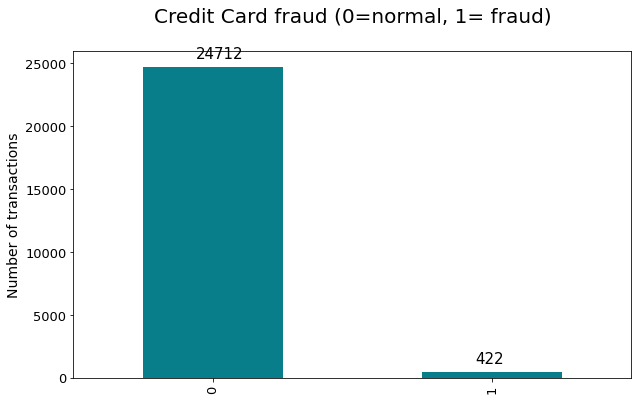

In [6]:
ax = df['TARGET'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13, color='#087E8B')
ax.set_title('Credit Card fraud (0=normal, 1= fraud)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x()+0.19, i.get_height() + 700, str(round(i.get_height(), 2)) , fontsize=15)

In [14]:
df['GENDER'] = [0 if x == 'M' else  1 for x in df['GENDER']]
df['CAR'] = [1 if x == 'Y' else 0 for x in df['CAR']]
df['REALITY'] = [1 if x == 'Y' else 0 for x in df['REALITY']]

dummy_income_type = pd.get_dummies(df['INCOME_TYPE'], prefix='INC_TYPE', drop_first=True)
dummy_edu_type = pd.get_dummies(df['EDUCATION_TYPE'], prefix='EDU_TYPE', drop_first=True)
dummy_family_type = pd.get_dummies(df['FAMILY_TYPE'], prefix='FAM_TYPE', drop_first=True)
dummy_house_type = pd.get_dummies(df['HOUSE_TYPE'], prefix='HOUSE_TYPE', drop_first=True)


to_drop =['Unnamed: 0', 'ID' 'FLAG_MOBIL','INCOME_TYPE','EDUCATION_TYPE', 'FAMILY_TYPE','HOUSE_TYPE']


df.drop(to_drop, axis=1, inplace=True)

merged = pd.concat([df,dummy_income_type,dummy_edu_type,dummy_family_type,dummy_house_type],axis=1)
merged.head()

NameError: name 'df' is not defined

In [15]:
from sklearn. preprocessing import MinMaxScaler

to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

for col in scaled :
    merged[col] = scaled[col]
    
merged.head()

NameError: name 'df' is not defined

In [20]:
from sklearn.model_selection import train_test_split

x = merged.drop('TARGET', axis=1)
y = merged['TARGET']

x_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)

print(f'''% Positive Class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive Class in Test = {np.round(y_test.value_counts(normalize=True[1] * 100, 2)}''')

SyntaxError: f-string: closing parenthesis '}' does not match opening parenthesis '(' (4202188400.py, line 11)